# 0.  cloab 버전!

기본 모듈

In [33]:
!pip install holiday
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import matplotlib.pyplot as plt


from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot
import holidays

from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import urllib.request
import requests
import json
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [35]:
#나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#matplotlib font 설정
import matplotlib .pyplot as plt
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 불러오기

In [37]:
train = pd.read_csv('/content/drive/MyDrive/기업연계프로젝트_9조/data/raw/public_data/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/기업연계프로젝트_9조/data/raw/public_data/test.csv') 

In [38]:
df = pd.concat([train, test], axis = 0).reset_index(drop= True)
grape = df[['date', '요일', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)']]
shinemuscat = df[['date', '요일','샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

display(grape.head(2))
display(shinemuscat.head(2))

,date,요일,캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0
1,2016-01-02,토요일,880.0,2014.0


,date,요일,샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0
1,2016-01-02,토요일,0.0,0.0


# 2. 캠벨얼리

In [39]:
grape['date'] = pd.to_datetime(grape['date'])
grape.set_index('date',drop=True,inplace=True)

In [92]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

sys_font number: 48


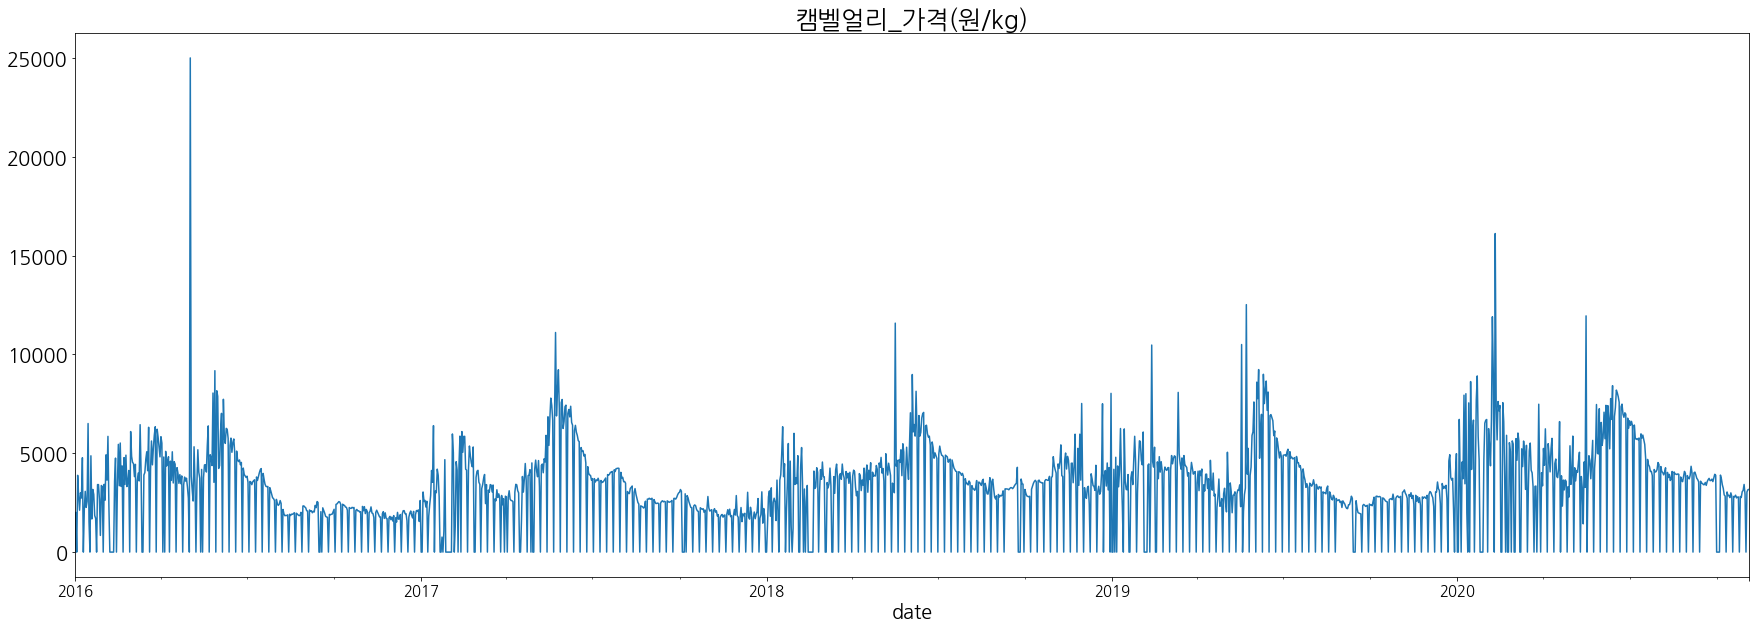

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('캠벨얼리_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
grape['캠벨얼리_가격(원/kg)'].plot(figsize=(30,10))

In [43]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = grape.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = grape.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = grape.reset_index(drop=False)['캠벨얼리_가격(원/kg)'] # 가격

main_train_df = main_df[:split]
main_test_df = main_df[split:]

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(main_train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzx2rw9xr/gmtfv_ml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzx2rw9xr/1dx4x0t6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24003', 'data', 'file=/tmp/tmpzx2rw9xr/gmtfv_ml.json', 'init=/tmp/tmpzx2rw9xr/1dx4x0t6.json', 'output', 'file=/tmp/tmpzx2rw9xr/prophet_model062y2lst/prophet_model-20221016075158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,5099.429120,3362.500330,6887.949878
1766,2020-11-01,-462.485125,-2176.770570,1215.800498
1767,2020-11-02,5116.590809,3258.307404,6941.926571
1768,2020-11-03,5020.479806,3206.587829,6903.821032
1769,2020-11-04,4934.103853,3213.686570,6723.631241


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

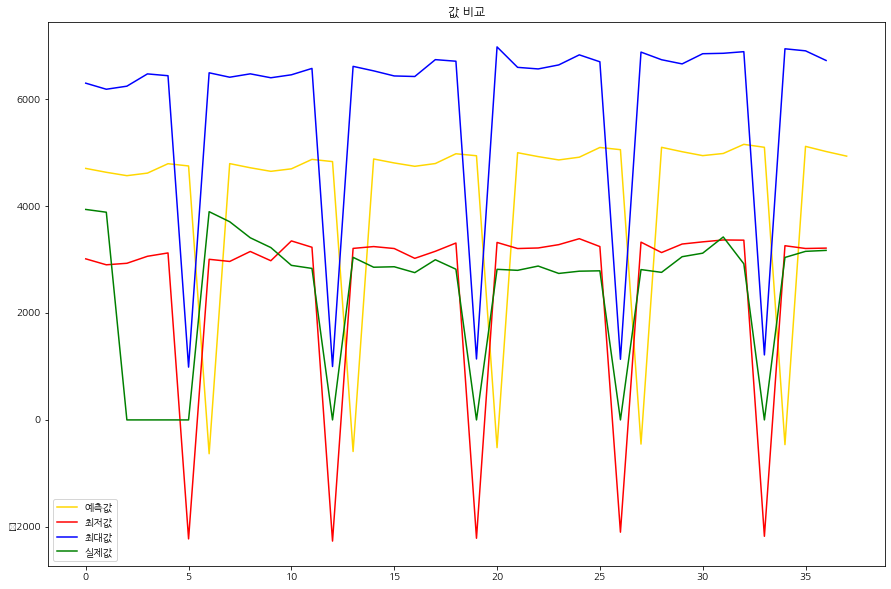

In [63]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = main_test_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [64]:
y_pred = forecast_data.yhat.values[-37:]

In [65]:
import math

In [66]:
test_y.shape

(37,)

In [82]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)),2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

2146.64
-1.693591570564267


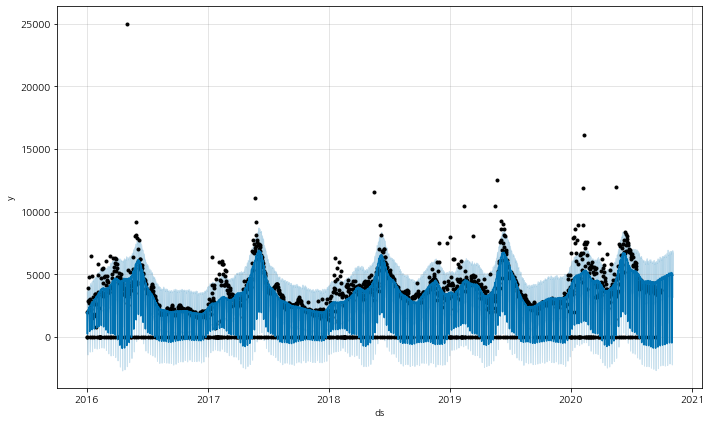

In [68]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

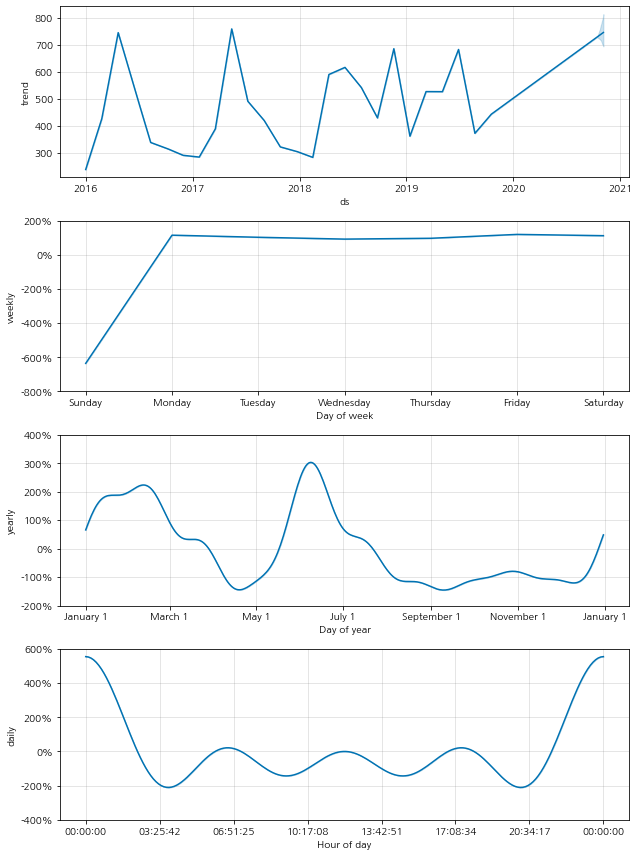

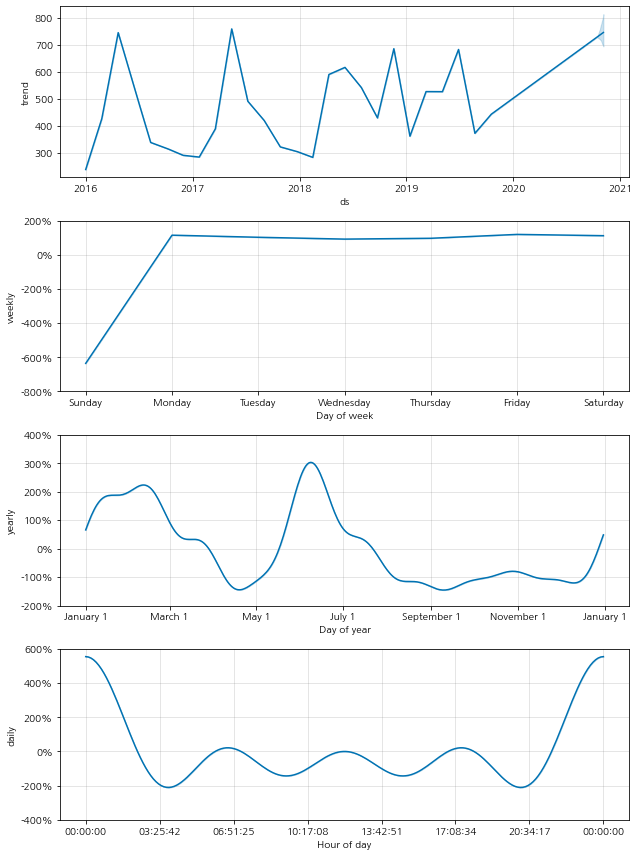

In [69]:
fig = prophet.plot_components(forecast_data)
fig

In [72]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,328.761862,3675.848310,1967.844026,3937.0
2020-09-30,190.117796,3709.908230,2011.493530,3885.0
2020-10-01,-1381.368820,1843.088962,249.092890,0.0
2020-10-02,501.040514,3765.833171,2141.359682,0.0
2020-10-03,475.949271,3784.467834,2171.192842,0.0
2020-10-04,527.636509,3841.324532,2203.005865,0.0
2020-10-05,653.060443,3991.195954,2272.948995,3895.0
2020-10-06,634.678935,4079.767914,2388.224171,3707.0
2020-10-07,625.537941,4119.670257,2423.335676,3407.0


In [73]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

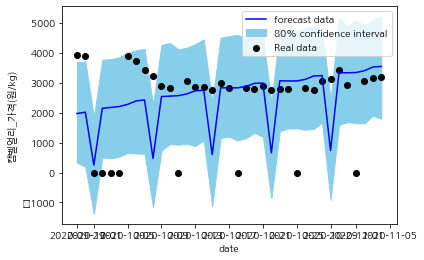

In [74]:
vsplot(result)

# 망했어요

# 3. 샤인머스켓

In [75]:
shinemuscat['date'] = pd.to_datetime(shinemuscat['date'])
shinemuscat.set_index('date',drop=True,inplace=True)

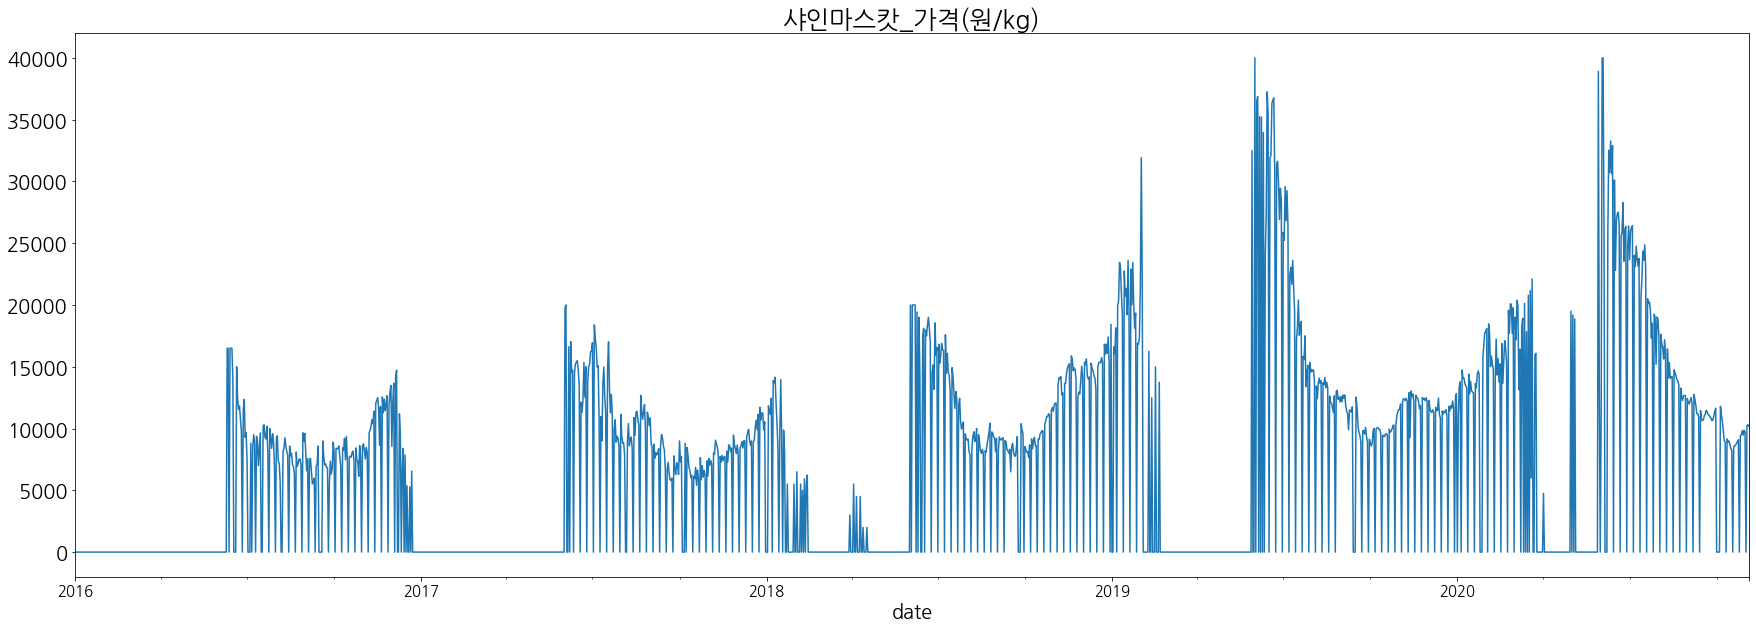

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('샤인마스캇_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
shinemuscat['샤인마스캇_가격(원/kg)'].plot(figsize=(30,10))

In [81]:
# train 20190101 ~ 20200928 / test 20200929 ~ 20201104

split = 1733

main_df = shinemuscat.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = shinemuscat.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = shinemuscat.reset_index(drop=False)['샤인마스캇_가격(원/kg)'] # 가격

main_train_df = main_df[:split]
main_test_df = main_df[split:]

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(main_train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzx2rw9xr/6zs9541b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzx2rw9xr/k7292_3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82690', 'data', 'file=/tmp/tmpzx2rw9xr/6zs9541b.json', 'init=/tmp/tmpzx2rw9xr/k7292_3r.json', 'output', 'file=/tmp/tmpzx2rw9xr/prophet_modeldqruc7cv/prophet_model-20221016080738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:07:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
future_data = prophet.make_future_dataframe(periods = 37, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1765,2020-10-31,17600.695031,11927.560039,23191.803979
1766,2020-11-01,989.932531,-4000.659906,6248.485907
1767,2020-11-02,18376.507844,13193.158035,24007.964712
1768,2020-11-03,17957.792401,12494.566104,23591.745224
1769,2020-11-04,17957.094816,12457.989265,23816.638034


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

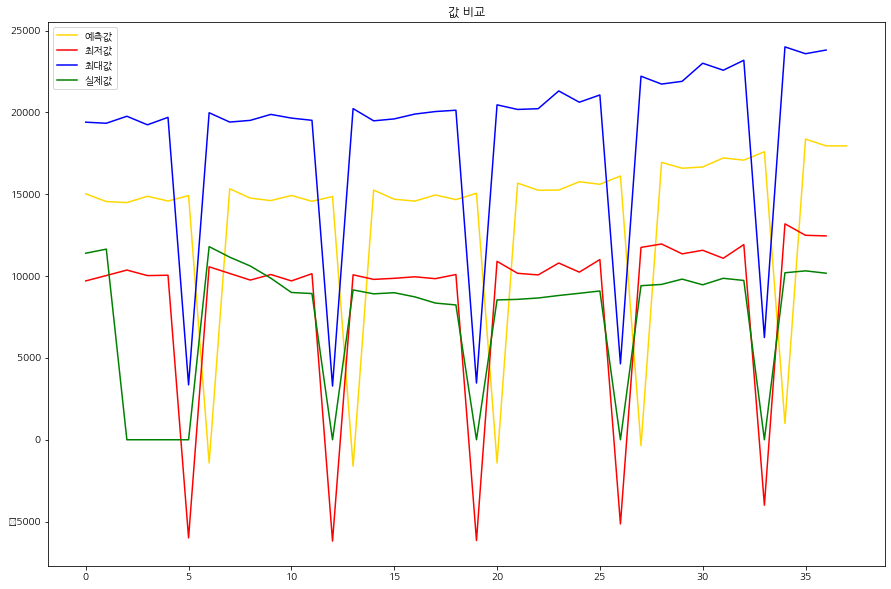

In [84]:
plt.figure(figsize=(15, 10))

# 마지막 37일의 예측 데이터 (2020-09-29 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 37일의 데이터 (2020-09-29 ~ 2020-11-04)
test_y = main_test_df.y.values

# 마지막 37일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-37:]
# 마지막 37일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-37:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [85]:
y_pred = forecast_data.yhat.values[-37:]

In [87]:
test_y.shape

(37,)

In [89]:
rmse = round(math.sqrt(mean_squared_error(test_y, y_pred)), 2)
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

7048.27
-2.044859734986077


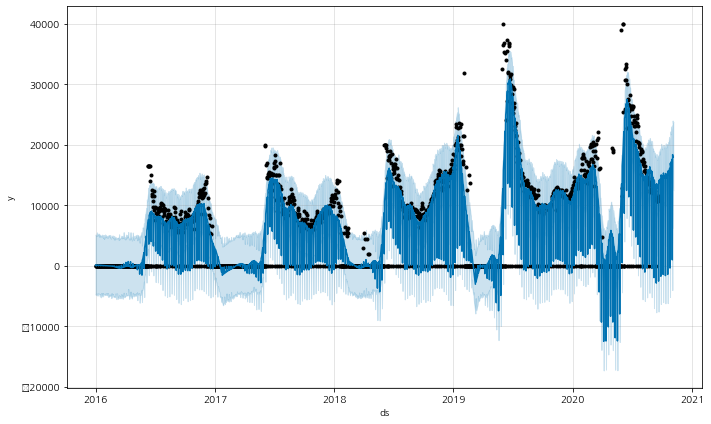

In [93]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

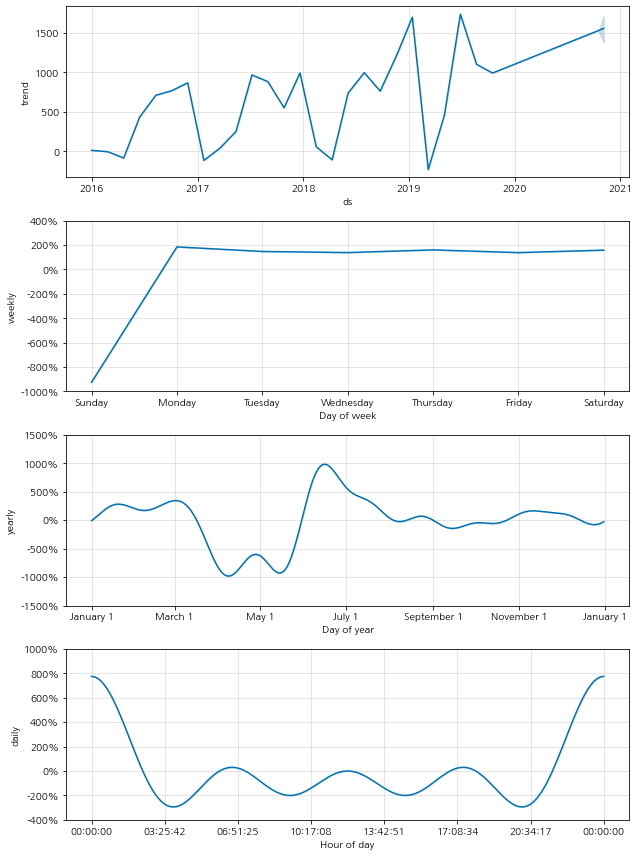

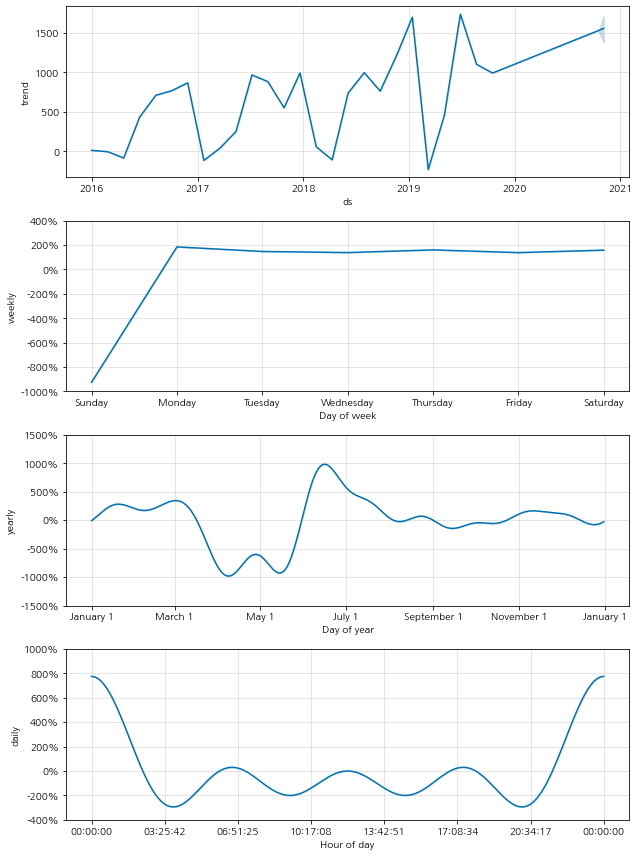

In [94]:
fig = prophet.plot_components(forecast_data)
fig

In [95]:
result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = grape[1733:]
result['real'] = temp_df['캠벨얼리_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,-4757.100795,5175.001479,116.060277,3937.0
2020-09-30,-4624.132666,5052.309873,117.308252,3885.0
2020-10-01,-4821.712551,5013.683882,-3.754834,0.0
2020-10-02,-4542.986521,5126.001896,118.135450,0.0
2020-10-03,-4649.612906,5530.597503,113.137216,0.0
2020-10-04,-4742.378755,4940.899466,111.166220,0.0
2020-10-05,-4931.887387,4991.197764,112.229032,3895.0
2020-10-06,-4542.417175,5328.768552,108.815695,3707.0
2020-10-07,-4553.885785,5173.862209,109.314108,3407.0


In [96]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('캠벨얼리_가격(원/kg)')
  plt.show()

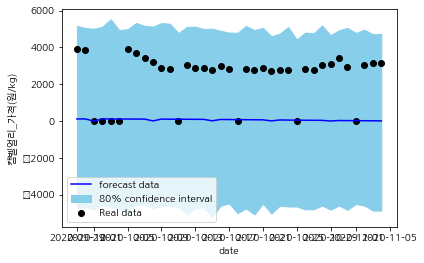

In [97]:
vsplot(result)

# 망했어요